# Intro to Data Analysis with Pandas & Jupyter, November 2019

Workshop lead: Sam Bail, Twitter @spbail

# Overview
The goal of this workshop is to give learners an intro to data analysis with Python using Pandas and Jupyter notebook. 
We will first go through the process of loading data from CSV files, inspecting and cleaning the data. As a second step, we will analyse the data and draw some insights about cancer treatment from it. 

The tutorial is structured as follows:

- Intro and background
- Part 0: Setup
- Part 1: Loading and inspecting data
- Part 2: Data cleaning
- Part 3: Data analysis
- Part 4: Summary

**Note that this tutorial is only intended as an introduction to some basic concepts of Pandas. It is in no means intended to be comprehensive, and there are a lot of useful functions a beginner needs to know to do in-depth data analysis. We hope that this tutorial sets you up for self-guided learning to master the full range of necessary Pandas tools.**

## How to follow along with the workshop
- You can run every cell in the notebook as we go along using the shortcut Shift+Enter
- You will encounter a few **** DIY exercise **** blocks where you'll get a few minutes to try out what you've just learned
- Feel free to save and download your notebook from Binder at the end since Binder deletes notebooks after 12 hours.

# Intro

## What is Jupyter (and the Jupyter ecosystem...)?
- IPython is an interactive Python shell (just type "ipython" to start it)
- Jupyter is a Python library that provides a web-based UI on top of ipython to create notebooks with code and output
- JupyterLab provides some additional features on top of Jupyter, e.g. a file browser
- Binder is a web-based hub for containers that contain your Python environment and renders notebooks based on a git repo

## What is Pandas/Matplotlib/Pyplot/Seaborn?

- Pandas is a Python library for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series.
- Matplotlib is a Python 2D plotting library. Pyplot is a collection of command style functions in matplotlib that make matplotlib work like MATLAB. While we mostly use Seaborn, we sometimes fall back to using Pyplot functions for certain aspects of plotting.
- Seaborn is a Python data visualization library based on matplotlib. It's kind of like a nicer version of Pyplot.


# Part 0: Setup

In order to run this notebook locally, make sure you have the following up and running on your laptop:
- A working Python 3 environment
- Recent versions of jupyter, pandas, matplotlib, seaborn (use `pip install` to install them)
- With your python environment activated, open a terminal and run `jupyter notebook` to start up the notebook server

## Quick intro to Jupyter notebooks

Notebooks are basically just interactive ipython terminals, intermixed with Markdown text:
- You can execute any kind of Python code
- Variables persist between cells
- The notebook doesn't care about the order of cells, just the order of executing it in order to remember variables

Notebooks have two modes: a) editing the cells and b) navigating the notebook.
- You can navigate around the notebook by clicking or using the arrow keys
- The first time you highlight a cell, it will have a blue border - this is the "navigate" mode
- In order to edit a cell (in "edit" mode), you can hit enter or double-click it.
- To execute the cell content, hit Shift+Enter to run the cell
- To get out of edit mode, hit the Escape key

Some additional helpful shortcuts:
- Ctrl+a to create a new cell above the current one
- Ctrl+b to create a new cell below the current one

## Imports

To complete this assignment we will use the Pandas data analysis library, with the Seaborn library for visualization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This command makes charts show inline in a notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]

In [ ]:
pd.__version__

In [ ]:
sns.__version__

# Part 1: Loading and inspecting the data

Before we can start answering questions about the data we need to do a little bit of exploratory analysis.The first thing we need to do when working with a new dataset is to get an idea of what the data looks like. We start by loading the data into memory. Pandas comes with a built-in `read_csv` function that we can use to read CSV files and load them directly to a pandas `DataFrame` object. 

In [ ]:
tx = pd.read_csv('./mock_treatment_starts_2016.csv')

There are a lot of different ways to read data into a dataframe - from lists, dicts, CSVs, databases... We're just covering CSV files here.

## What is a DataFrame?
A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used Pandas object. 

Pandas borrows the concept of DataFrame from the statistical programming language R.

Let's take a look at the data to familiarize ourselves with the format and data types.

In [ ]:
# Just using the name of the dataframe will print the entire output
# If there are too many rows, Jupyter will print the top few and bottom few rows
# with a "..." to indicate that there are more rows
tx

In [ ]:
# The head() function shows the first n rows in a dataframe.
tx.head()

In [ ]:
# You can also use the sample() function to get n random rows in the dataframe
# NOTE: sample() only works in newer versions of pandas (0.16.1 and upwards)
tx.sample(5)

In [ ]:
# Then len function gives us the number of rows in the dataframe
len(tx)

In [ ]:
# The dtypes property of a dataframe shows the datatypes of every column in a dataframe.
tx.dtypes

## ** DIY exercise **
Print the first ten rows of the "tx" dataframe in the cell below

## Accessing columns in a dataframe

<span style="color:blue">**Note: We will be applying `head()` to some results in this tutorial to keep the output short. When working with a real dataset, keep in mind that you might be hiding some interesting records if you always use `head()` or `sample()`!**</span>

In Pandas, you can access a specific column using the following notation which returns a **Series** (not a dataframe) - a Series is simply a vector, aka a 1-dimensional data structure similar to a list.

In [ ]:
tx.PatientID.head()

In [ ]:
# Check the type to show that this indeed returns a Series object
type(tx.PatientID)

In [ ]:
# The alternative notation for accessing a column in a dataframe
# Some people prefer the . notation, others the [] notation.
tx['PatientID'].head()

In [ ]:
# And this is how you access two columns of a dataframe.
# Note that this will return a dataframe again, not a series (because a series has only one column...)
# Also note the double square brackets - you're passing a *list* as an argument
tx[['PatientID', 'Dosage']].head()

In [ ]:
type(tx[['PatientID', 'TreatmentStart']])

In [35]:
# This way we can now do some more data exploration, e.g. looking at unique patients
tx['PatientID'].unique()

array(['PT1', 'PT10', 'PT11', 'PT12', 'PT13', 'PT14', 'PT15', 'PT16',
       'PT17', 'PT18', 'PT19', 'PT2', 'PT20', 'PT3', 'PT4', 'PT5', 'PT6',
       'PT7', 'PT8', 'PT9'], dtype=object)

## ** DIY exercise **
Print the list of unique drugs in the dataframe in the cell below:

## Accessing rows in a dataframe
In addition to slicing by column, we often want to get the record where a column has a specific value, e.g. a specific Patient_ID here. This can be done using the following syntax:

In [ ]:
# Access the diagnosis record(s) for a specific patient ID
tx.loc[tx['PatientID'] == 'PT5']

In [ ]:
# This is equivalent with the following shorter notation
tx[(tx['PatientID'] == 'PT20') & (tx['Drug'] == 'Cisplatin')]

## ** DIY exercise **
Get all rows where Dosage is greater than 180:

There are many different ways to access rows and columns in Pandas. We're only introducing a small set here in order to keep the tutorial simple.

## Sorting dataframes
Sorting a dataframe by one or multiple columns is super easy:

In [ ]:
# Sort by earliest treatment start date, i.e. in ascending order
tx.sort_values('TreatmentStart').head()

# NOTE: sort_values only works in Pandas 0.17.0 and up. This is an older version:
# tx.sort('TreatmentStart').head()

In [ ]:
# Sort by latest treatment start, i.e. in descending order
tx.sort_values('TreatmentStart', ascending=False).head()

# NOTE: sort_values only works in Pandas 0.17.0 and up. This is an older version:
# tx.sort('TreatmentStart', ascending=False).head()

In [ ]:
# Finally, you can also sort by multiple columns:
tx.sort_values(['PatientID', 'TreatmentStart']).head()

# NOTE: sort_values only works in Pandas 0.17.0 and up. This is an older version:
# tx.sort(['PatientID', 'TreatmentStart']).head()

<span style="color:blue">**Note: Any operations on a dataframe are *not* permanent, i.e. they only modify the current output, but not the actual dataframe. If you want to preserve the sorting, for example, you have to either assign the output to a new variable, or use the `inplace=True` argument. This will not create any output but actually modify the dataframe.**</span>

In [ ]:
tx

In [ ]:
tx.sort_values(['PatientID', 'TreatmentStart'], inplace=True)

In [ ]:
tx

## ** DIY exercise **
Sort the dataframe by dosage, in descending order (highest dosage first):

# Part 2: Data cleaning

In [ ]:
# Remember the dtypes property... the TreatmentStart column should really be a date, right?
tx.dtypes

## Date conversion

Right away we can see that the date field TreatmentDate is stored as string (object). It might be useful to convert it to **Datetime** objects so that we can perform common date arithmetic on them, like checking if a date came before or after another date, or calculating the number of days between two dates.

In [ ]:
tx['TreatmentStart'] = pd.to_datetime(tx['TreatmentStart'])

In [ ]:
tx.dtypes

In [ ]:
# This is the alternative notation to assign a value to a column in a dataframe
tx.TreatmentStart = pd.to_datetime(tx.TreatmentStart)

# Part 3: Data analysis
Let's assume we've loaded the treatment related data from a cancer clinic in order to provide them with some analytical insights around the types of drugs they use on their patient population.

## Question 1: Patients treated at the practice

**How many patients does the practice treat?**

In [36]:
# Our data frame contains patient IDs and treatment starts -
# let's check if some patients have multiple treatment starts?
# The unique() function returns the number of unique values in a dataframe column.
print('Number of treatment start records:', len(tx))
print('Number of unique patients who start treatment:', len(tx.PatientID.unique()))

Number of treatment start records: 23
Number of unique patients who start treatment: 20


So there are 20 unique patients but we have 23 treatment starts, meaning some patients start different treatments in the time that we have data for. This means that if we want to answer the question correctly, we need to make sure to only count unique patients.

## Question 2: Drugs used at the practice
**What are the drugs used at the practice and how many patients receive those drugs?**

In [37]:
tx.groupby('Drug')

In [38]:
# The groupby function works like a groupby in SQL, i.e. it groups the dataframe by the specified
# column and then lets you apply aggregate functions on the grouped values, e.g. counts, sums, means...
# The count function counts the number of rows with values in a column
# NOTE that this might include duplicates!!! (Not in this data...)
tx.groupby('Drug').count()

,PatientID,TreatmentStart,Dosage
Drug,,,
Cisplatin,15,15,15
Nivolumab,8,8,8


In [39]:
# Since we are only interested in the number of patients, 
# we select only the relevant column from the resulting dataframe
# Note that "PatientID" might not be the best name for this column
# - we can use a rename() function in Pandas to rename it to something like
# "PatientCount" (skipping the rename step in this tutorial, but feel free to look it up!)
tx.groupby('Drug').count()[['PatientID']]

,PatientID
Drug,
Cisplatin,15
Nivolumab,8


In [40]:
tx

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,2016-01-14,Cisplatin,200
18,PT1,2016-06-17,Nivolumab,240
11,PT10,2016-04-07,Nivolumab,240
12,PT11,2016-04-17,Cisplatin,190
14,PT12,2016-05-15,Cisplatin,1800
15,PT13,2016-05-21,Cisplatin,180
16,PT14,2016-05-03,Nivolumab,240
17,PT15,2016-05-07,Nivolumab,240
13,PT16,2016-04-09,Cisplatin,160
19,PT17,2016-06-17,Cisplatin,160


### A little bit about indexes in dataframes
Notice that in the above example, the "Drug" column is printed in bold. That's because grouping by it has turned it into the **index** of the resulting dataframe.

The index in a dataframe is the "row identifier" - it is generally printed as the column on the left. For example, when we first loaded our data, the index didn't have a name and was just an incrementing integer (scroll up to check!). When you create a groupby object, the index of a resulting dataframe will be the column you group by - in this case, the Drug column became the index.

We frequently **reset** the index in a dataframe for various reasons - in this case, because the index contains data that you want to treat as a column, e.g. for plotting.

In [41]:
# Reset the index in this resulting dataframe to see what happens:
tx.groupby('Drug').count()[['PatientID']]

,PatientID
Drug,
Cisplatin,15
Nivolumab,8


In [42]:
tx.groupby('Drug').count()[['PatientID']].reset_index()

,Drug,PatientID
0,Cisplatin,15
1,Nivolumab,8


In [43]:
# Remember that any operations on the dataframe only modify the output? 
# We didn't *really* group tx or reset the index. 
# The tx dataframe is still the same it was at the beginning:
tx.head()

,PatientID,TreatmentStart,Drug,Dosage
0,PT1,2016-01-14,Cisplatin,200
18,PT1,2016-06-17,Nivolumab,240
11,PT10,2016-04-07,Nivolumab,240
12,PT11,2016-04-17,Cisplatin,190
14,PT12,2016-05-15,Cisplatin,1800


### Let's plot this! (aka our first Seaborn plot)

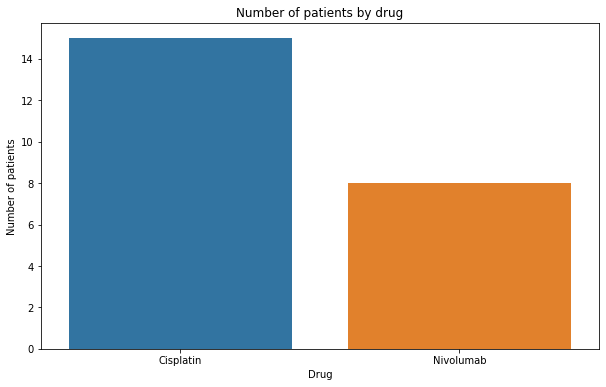

In [44]:
# Let's do the same groupby as above to get the number of patient starts per drug!
# This time, we actually assign the output to a new dataframe to make the transformation permanent!
counts = tx\
    .groupby('Drug')\
    .count()[['PatientID']]\
    .reset_index()
counts
# Let's use a simple bar chart in Seaborn to compare counts for the two drugs
# There are several different ways to do the plotting - this is my preferred style,
# but you might prefer different syntax
fig = sns.barplot(data=counts, x='Drug', y='PatientID')
plt.title('Number of patients by drug')
plt.ylabel('Number of patients')
plt.xlabel('Drug')
plt.show(fig)

## Question 3: Changes to treatment over time
**Do we see any changes in treatment patterns over time?**

Our data shows treatment starts by date. Let's group these starts by month to see if there are any changes of how many patients start on a given drug over time, e.g. because a new drug got approved.

*Note that the data we're using here is dummy data and pretty artificial - oncology clinics see a much higher volume of patients, and drug uptake is usually slower than shown here.*

In [45]:
# Let's add a new column that only has the treatment month to simplify things
# There are many different ways to do this, we picked a simple one
tx['TreatmentStartMonth'] = tx['TreatmentStart'].astype('datetime64[M]')

# NOTE .astype('datetime64[M]') only works in more recent versions of Pandas, this is an older version:
# from datetime import datetime
# tx['TreatmentStartMonth'] = tx['TreatmentStart'].apply(lambda x: x.replace(day=1))

tx.head()

,PatientID,TreatmentStart,Drug,Dosage,TreatmentStartMonth
0,PT1,2016-01-14,Cisplatin,200,2016-01-01
18,PT1,2016-06-17,Nivolumab,240,2016-06-01
11,PT10,2016-04-07,Nivolumab,240,2016-04-01
12,PT11,2016-04-17,Cisplatin,190,2016-04-01
14,PT12,2016-05-15,Cisplatin,1800,2016-05-01


In [46]:
# Let's count the number of starts per month per drug to plot it later
# We only want the number of patients, so we filter for that column at the end
drugs_by_month = tx.groupby(['TreatmentStartMonth', 'Drug']).count()[['PatientID']]
drugs_by_month

PatientID
TreatmentStartMonth Drug                
2016-01-01          Cisplatin          4
2016-02-01          Cisplatin          3
2016-03-01          Cisplatin          3
                    Nivolumab          1
2016-04-01          Cisplatin          2
                    Nivolumab          1
2016-05-01          Cisplatin          2
                    Nivolumab          2
2016-06-01          Cisplatin          1
                    Nivolumab          4

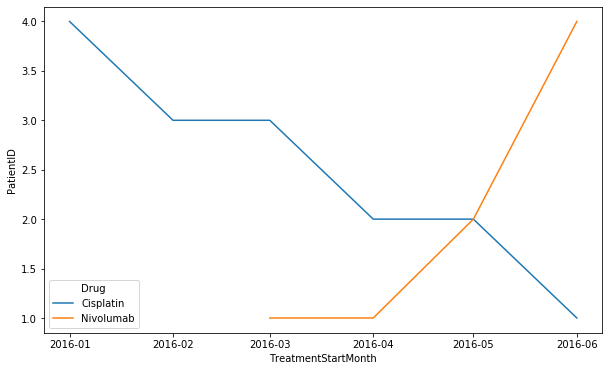

In [49]:
# The data already looks interesting... let's plot this 
# Remember to reset_index so we can plot the regular columns
# The "hue" keyword is generally used to distinguish two different categorial variables
# in plots, e.g. in this case the two different drugs
# NOTE: lineplot() only exists in Seaborn version 0.9 and up
fig = sns.lineplot(data=drugs_by_month.reset_index(), 
                   x='TreatmentStartMonth', 
                   y='PatientID',
                  hue='Drug')
plt.show(fig)

## [Optional] Question 4: Dosage and outliers
**Question: What is the average dosage of each drug? Are there any outliers?**

In [ ]:
# An easy first step is to group by the respective drug and use describe()
tx.groupby(['Drug']).describe()

In [ ]:
# This is an example of a more complex way to get aggregates in Pandas
# The agg function takes a dictionary of column:function pairs,
# where "function" can be a built-in function like count, mean, min, etc, 
# or a custom function like a lambda.
tx.groupby(['Drug']).agg({'Dosage': 'mean'})

In [ ]:
# We can also pass a list of functions to a column to get multiple outputs!
tx.groupby(['Drug']).agg({'Dosage': ['count', 'mean', 'std', 'min', 'max']})

In [ ]:
# We can plot this easily in Seaborn - but the outlier squashes our display
fig = sns.boxplot(data=tx, x='Drug', y='Dosage')
plt.show(fig)

In [ ]:
# Use showfliers=False in a boxplot to suppress outliers
fig = sns.boxplot(data=tx, x='Drug', y='Dosage', showfliers=False)
plt.show(fig)

# Part 4: Summary!

We hope this workshop was useful for you. We've only touched on some of the basic concepts of pandas, but we believe this will give you the foundations to keep exploring the data! We covered:

- Dataframes and series in pandas
- Basic data inspection (head, describe, dtypes, accessing columns and rows, sorting)
- Grouping and aggregating (count, nunique)
- Indexing in dataframes and reset_index
- Plotting (bar plots, line plots)

**What we didn't learn:**

This is my (biased) list of very frequent Pandas operations that we didn't cover but you'll likely need for data analysis:
- Joining/merging multiple dataframes
- Filtering and de-duplicating dataframes
- More complex modifications of column values, e.g. filling null values, using lambda functions
- More complex aggregates on grouped dataframes (sum, mean, etc)
- Renaming columns (e.g. renaming an aggregate "PatientID" column to something more meaningful like "PatientCount")

samanthapbail@gmail.com / @spbail